# Исследование данных о продажах компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Важное условие - исследование должно помочь построить прогноз на 2017 год.
<br/><br/>
**Цель исследования:** выявить определяющие успешность игры закономерности.  
<br/><br/>
**Ход исследования:**
1) Обзор и предобработка данных
<br/><br/>
2) Исследовательский анализ данных
<br/><br/>
3) Составление портрета пользователя каждого региона
<br/><br/>
4) Проверка гипотез
<br/><br/>
5) Общий вывод

### Обзор и предобработка данных

#### Откроем файл с данными и изучим общую информацию. 

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# открываем датасет
df = pd.read_csv('/datasets/games.csv')

In [3]:
# изучаем имеющиеся данные методом info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# выведем первые 5 строк датасета методом head()
display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


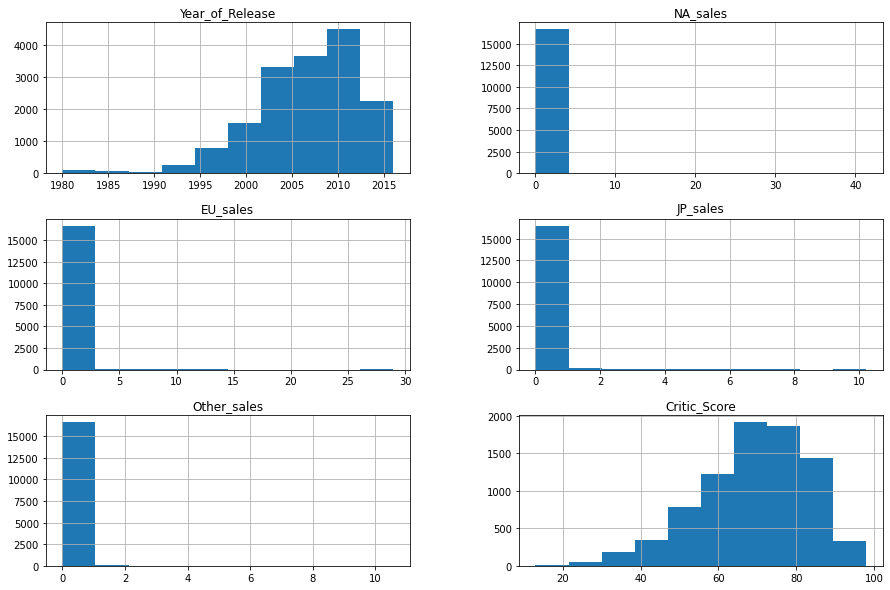

In [5]:
# построим общую гистрограмму для всех столбцов таблицы
df.hist(figsize=(15, 10));

**Промежуточный вывод по разделу 1.1:**<br>  
Данные представляют собой таблицу из 11 столбцов и содержат информацию до 2016 года.<br>

Name — название игры<br> 
Platform — платформа<br> 
Year_of_Release — год выпуска<br> 
Genre — жанр игры<br> 
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br> 
EU_sales — продажи в Европе (миллионы проданных копий)<br> 
JP_sales — продажи в Японии (миллионы проданных копий)<br> 
Other_sales — продажи в других странах (миллионы проданных копий)<br> 
Critic_Score — оценка критиков (максимум 100)<br> 
User_Score — оценка пользователей (максимум 10)<br> 
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>

Таблица содержит пропуски и некорректные типы данных.

В ходе предобработки данных необходимо:<br> 
1) привести столбцы к нижнему регистру и проверить дубликаты.<br> 
2) преобразовать типы данных.<br> 
3) обработать пропуски там, где это необходимо.<br>
4) посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.<br>  


#### Предобработка данных.

1) Приведём все столбцы к нижнему регистру и проверим дубликаты.

In [6]:
# применим метод lower для каждого из названий столбцов
df.columns = [x.lower() for x in df.columns]
# проверим результат, выведем названия столбцов на экран
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [7]:
# проверим наличие явных дубликатов методом duplicated
df.duplicated().sum()

0

Названия столбцов приведены к нижнему регистру. Явных дубликатов не выявлено. 

2) Преобразуем типы данных. 

В столбце year_of_release указан год выпуска игры. Сейчас данные разделены точкой. Год не может быть дробным, поэтому преобразуем данные в тип int.

In [8]:
# применяем метод astype с аргументом Int64, т.к. в столбце есть пропуски
df['year_of_release'] = df['year_of_release'].astype('Int64')
# выводим на экран первые строки столбца и проверяем тип данных
print(df['year_of_release'].head())


0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: Int64


Столбец user_score должен содержать тип данных float, т.к. это рейтинг, который игрок присваивает игре. Но ранее мы выявили тип данных object. Вероятно, в этом столбце имеются строковые данные. Необходимо рассмотреть их при дальнейшем анализе. 

3) Обработаем пропуски. 

Выведем количество пропущенных значений для каждого столбца.

In [9]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Проверим количество пропусков в процентах.

In [10]:
# считаем процент пропусков и подсвечиваем заливкой
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


В столбцах name и year_of_release процент пропусков менее 5. Отбросим их. 

In [11]:
# удаляем пропуски в столбцах name и year_of_release методом dropna
df = df.dropna(subset=['name'])
df = df.dropna(subset=['year_of_release'])
# проверяем количество пропусков
print(df['name'].isna().sum())
print(df['year_of_release'].isna().sum())

0
0


Ранее мы выявили некорректный тип данных в столбце user_score. Проверим, какие значения там встречаются. 

In [12]:
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Значение 'tbd' - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. 
Заменим эти значения на NaN.

In [13]:
# заменим знаения tbd на nan методом replace
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

In [14]:
# приведем значения в столбце user_scoe к типу float методом astype
df['user_score'] = df['user_score'].astype(float)
# проверим тип данных в столбце user_score
df['user_score'].dtype

dtype('float64')

Пропуски в столбце rating могут означать, что игра выпущена в стране, где не  используется рейтинг ESRB. Заполним эти пропуски значением "without rating".

In [15]:
df['rating'] = df['rating'].fillna('unknown')
# проверяем количество пропусков в столбце rating
df['rating'].isna().sum()

0

Пропуски в столбцах name и year_of_release могли быть случайными - пользователь мог забыть указать данные или не знать конкретной информации об игре. Пропуски в столбцах critic_score, user_score могли возникнуть из-за того, что пользователи ещё не опреелились с оценкой. Пропуски в столбце с категориальными данными rating были заполнены в зависимости от жанра игры. 

4) Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [16]:
# создадим и запишем в столбец total_sales сумму столбцов na_sales, eu_sales, jp_sales, other_sales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
# выведем на экран весь датасет
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


**Промежуточный вывод по разделу 1.2:**<br>  
Названия столбцов приведены к нижнему регистру. Явных дубликатов обнаружено не было. Был преобразован тип данных в столбце year_of_release. Обработаны пропуски в столбцах name и year_of_release. Были посчитаны суммарные продажи во всех регионах и записаны в столбец total_sales.


**Вывод по разделу 1:**<br>  

Данные представляют собой таблицу из 12 столбцов и содержат информацию до 2016 года.
Столбец total_sales был добавлен в ходе подхотовки данных. Он содержит в себе суммарные продажи во всех регионах.<br>  

В ходе предобработки данных названия столбцов были приведены к нижнему регистру. Тип данных в столбце year_of_release был изменен с float на int, т.к. значение календарного года может быть только целым. Также был выявлен некорректный тип данных в столбце user_score - object, хотя информация в столбце подразумевает оценку пользователя в формате float. Было найдено значение tbd - To Be Decided, означающее, что пользователь  ещё не определился с оценкой. В связи с этим значение tbd было заменено на NaN.<br> 

Были удалены пропуски в столбцах name и year_of_release. Они были определены как случайные, например пользователь забыл указать эти данные. Процент этих пропусков составлял менее 5% от всего датасета, поэтому они были убраны методом dropna. 
Пропуски в столбцах critic_score, user_score, определены как не случайные. Пользователи намеренно не заполняли эти данные, т.к. ещё не определились с оценкой. Пропуски не были заполнены, т.к. мы не можем определить субъективную оценку игры отдельно взятого человека. Пропуски в столбце rating были заполнены значением unknown, т.к. предположено, что игра выпущена в стране, где система рейтинга ESRB не используется. <br> 

**В ходе исследовательского анализа данных необходимо:** 

1) оценить, сколько игр выпускалось в разные годы, важны ли данные за все периоды. <br> 
2) определить, как менялись продажи по платформам, построить распределение по годам и сделать вывод о жизненном цикле платформ.<br> 
3) определить актуальный период для дальнейшего анализа.<br> 
4) определить потенциально прибыльные платформы.<br> 
5) оценить глобальные продажи игр в разбивке по платформам.<br> 
6) оценить, как отзывы пользователей и критиков влияют на продажи внутри платформы (посчитать корреляцию между отзывами и продажами).<br> 
7) соотнести выводы с продажами игр на других платформах.<br>
8) определить самые прибыльные жанры игр.

In [17]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


### Исследовательский анализ данных.

#### Рассмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды. 

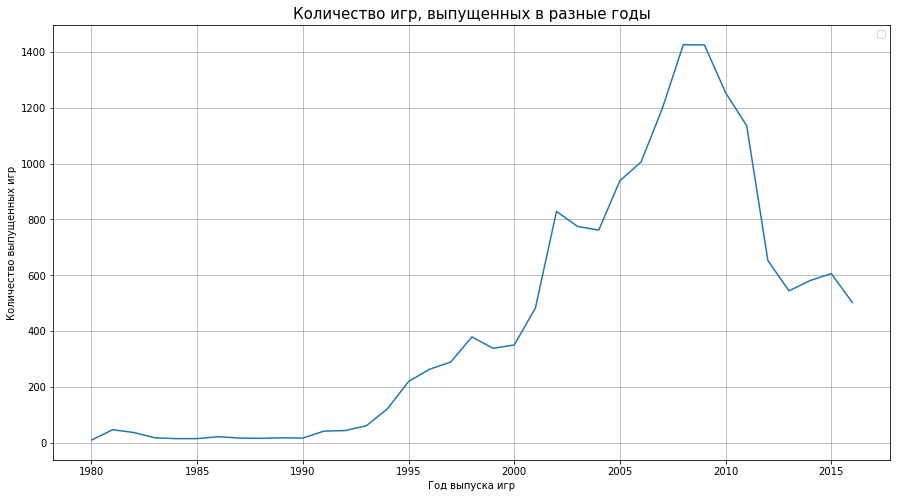

In [18]:
# создадим сводную таблицу по количеству игр, выпущенных в разные годы и запишем в переменную games_years
games_years = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
# построим линейный график по сводной таблице games_years
games_years.plot(figsize = (15,8), grid = True)
plt.title('Количество игр, выпущенных в разные годы', fontsize=15)
plt.xlabel("Год выпуска игр", fontsize=10)
plt.ylabel("Количество выпущенных игр", fontsize=10)
plt.legend('');


Из графика видно, что в датасете представлены игры с 1980 по 2016 год выпуска. При этом количество игр до 1995 г. довольно мало, до 200 игр. Значимым для анализа может быть период с 1995 по 2016 г., т.к. мы видим близкий к экспоненциальному рост, а затем спад. С учетом постепенного устаревания игр период для анализа можно сократить -  рассмотреть игры, выпущенные с 2013 до 2015 г., но прежде проведем дополнительный анализ. 

##### Выберем платформы с наибольшими суммарными продажами 

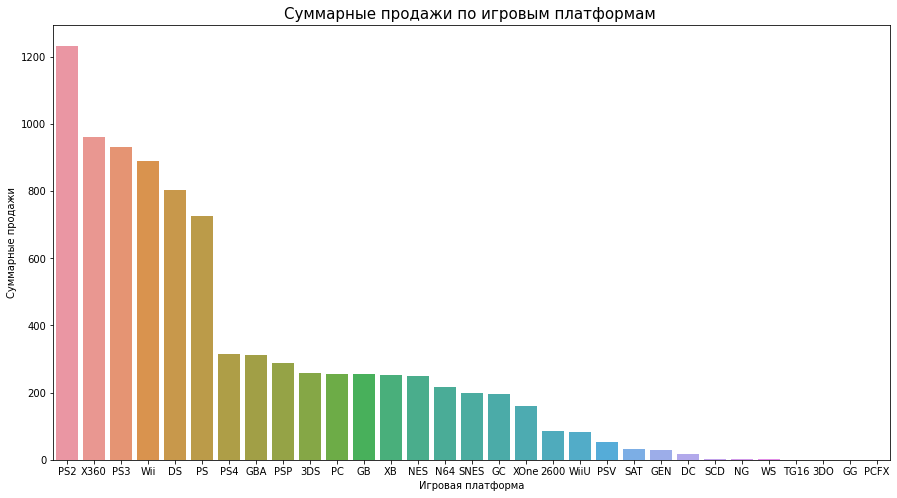

In [19]:
# создадим сводную таблицу по игровым платформам и их суммарным продажам и запишем в переменную platform_sales
platform_sales = df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
# строим столбчатую диаграмму по сводной таблице platform_sales
plt.figure(figsize=(15,8))
sns.barplot(data=platform_sales, x='platform', y='total_sales')
plt.title('Суммарные продажи по игровым платформам ',fontsize=15)
plt.xlabel('Игровая платформа',fontsize=10)
plt.ylabel('Суммарные продажи',fontsize=10);

Наибольшие суммарные продажи показывают платформы PS2, X360, PS3, Wii, DS и PS.

##### Для платформ с наибольшими суммарными продажами построим распределение по годам. 

Сделаем срез по платформам, покасавшим наибольшие суммарные продажи.

In [20]:
# методом query сделаем срез по интересующим нас платформам и сохраним в переменную top_platforms
top_platforms = df.query(
    "platform == 'PS2'| platform == 'X360' | platform == 'PS3' | platform == 'Wii' | platform == 'DS' | platform == 'PS' ")
# выведем на экран датасет top_platforms
top_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Создадим сводную таблицу по суммарным продажам платфромы с привязкой по годам. 

In [21]:
# методом pivot_table создаем сводную таблицу и записываем в переменную top_platforms_years
top_platforms_years = top_platforms.pivot_table(
    index=['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
top_platforms_years

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
...,...,...,...
62,X360,2012,99.74
63,X360,2013,88.58
64,X360,2014,34.74
65,X360,2015,11.96


Сделаем срезы по платформам и запишем их в отдельные переменные. 

In [22]:
# сделаем срез по каждой платформе и запишем в переменную 
top_platforms_years_PS2 = top_platforms_years.loc[top_platforms_years['platform'] == 'PS2']
top_platforms_years_X360 = top_platforms_years.loc[top_platforms_years['platform'] == 'X360']
top_platforms_years_PS3 = top_platforms_years.loc[top_platforms_years['platform'] == 'PS3']
top_platforms_years_Wii = top_platforms_years.loc[top_platforms_years['platform'] == 'Wii']
top_platforms_years_DS = top_platforms_years.loc[top_platforms_years['platform'] == 'DS']
top_platforms_years_PS = top_platforms_years.loc[top_platforms_years['platform'] == 'PS']

Построим графики суммарных продаж каждой платформы по годам. 

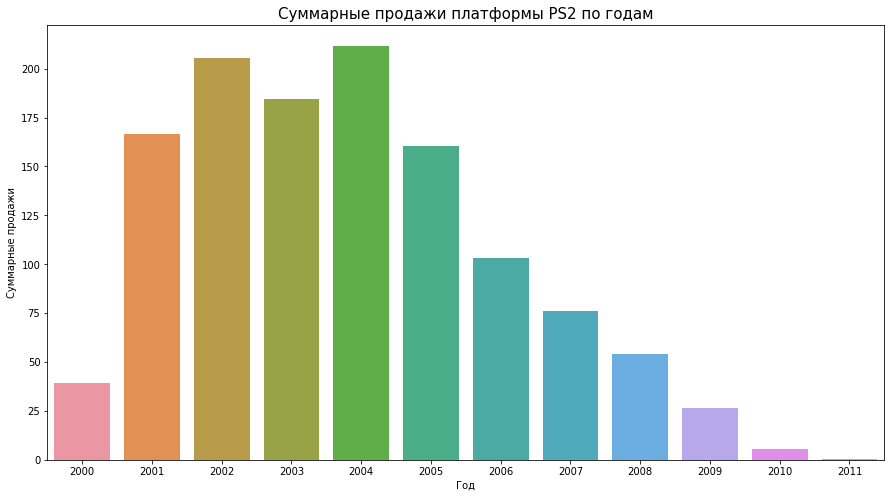

In [23]:
# график для платформы PS2
plt.figure(figsize=(15,8))
sns.barplot(data=top_platforms_years_PS2, x='year_of_release', y='total_sales')
plt.title('Суммарные продажи платформы PS2 по годам',fontsize=15)
plt.xlabel('Год',fontsize=10)
plt.ylabel('Суммарные продажи',fontsize=10);


Вывод по графику для платформы PS2:

Год начала продаж - 2000.
Лучшие продажи 2001 - 2005.
Год окончательного спада продаж 2011.

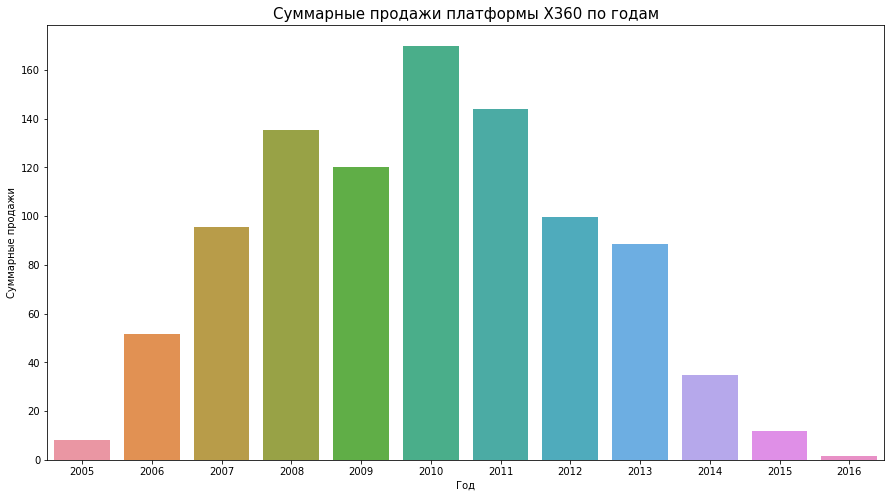

In [24]:
# график для платформы X360
plt.figure(figsize=(15,8))
sns.barplot(data=top_platforms_years_X360, x='year_of_release', y='total_sales')
plt.title('Суммарные продажи платформы X360 по годам',fontsize=15)
plt.xlabel('Год',fontsize=10)
plt.ylabel('Суммарные продажи',fontsize=10);


Вывод по графику для платформы X360:

Год начала продаж - 2005.
Лучшие продажи 2007 - 2013.
Год окончательного спада продаж 2016.

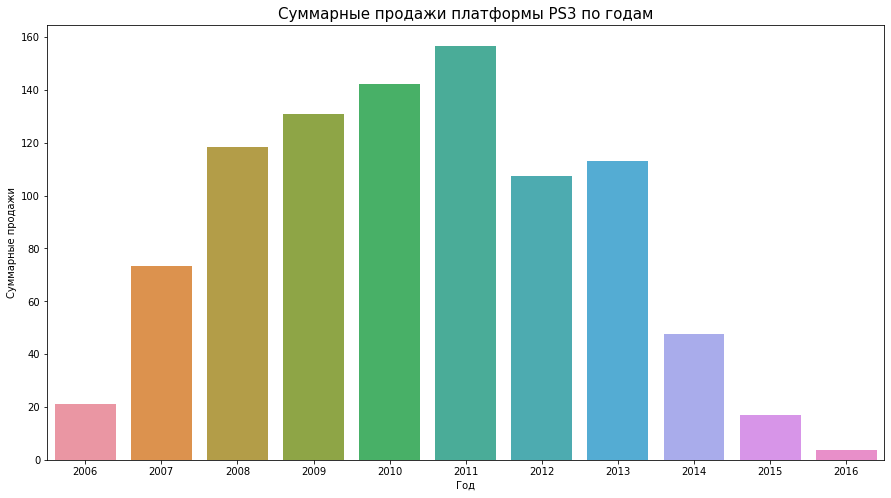

In [25]:
# график для платформы PS3
plt.figure(figsize=(15,8))
sns.barplot(data=top_platforms_years_PS3, x='year_of_release', y='total_sales')
plt.title('Суммарные продажи платформы PS3 по годам',fontsize=15)
plt.xlabel('Год',fontsize=10)
plt.ylabel('Суммарные продажи',fontsize=10);


Вывод по графику для платформы PS3:

Год начала продаж - 2006.
Лучшие продажи 2008 - 2013.
Год окончательного спада продаж 2016.

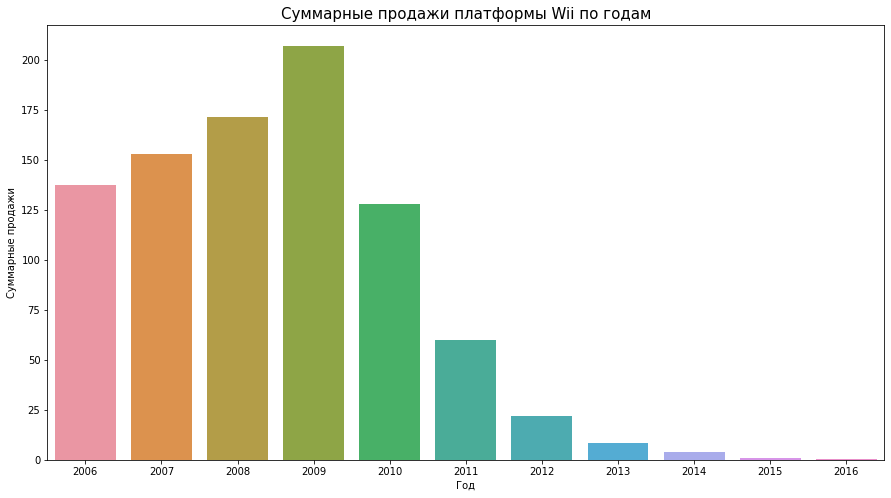

In [26]:
# график для платформы Wii
plt.figure(figsize=(15,8))
sns.barplot(data=top_platforms_years_Wii, x='year_of_release', y='total_sales')
plt.title('Суммарные продажи платформы Wii по годам',fontsize=15)
plt.xlabel('Год',fontsize=10)
plt.ylabel('Суммарные продажи',fontsize=10);


Вывод по графику для платформы Wii:

Год начала продаж - 2006. Лучшие продажи 2006 - 2010. Год окончательного спада продаж 2016.

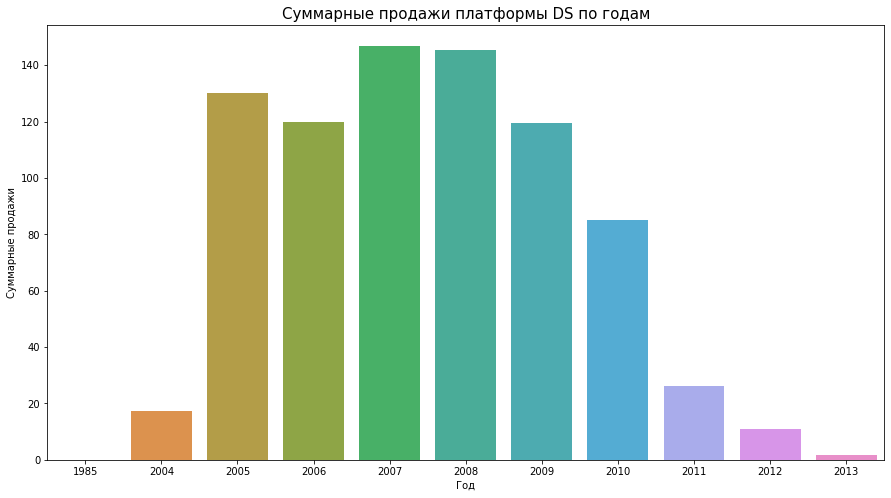

In [27]:
# график для платформы DS
plt.figure(figsize=(15,8))
sns.barplot(data=top_platforms_years_DS, x='year_of_release', y='total_sales')
plt.title('Суммарные продажи платформы DS по годам',fontsize=15)
plt.xlabel('Год',fontsize=10)
plt.ylabel('Суммарные продажи',fontsize=10);


На графике видно странный выброс - 1985 г. Согласно официальным источникам, платформа вышла только в 2004 году.

In [28]:
# выведем на экран игру/игры 1985 года выпуска на платфрме DS
display(df.loc[(df['year_of_release'] == 1985) & (df['platform'] == 'DS')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


Если продажи действительно были, то их немного. Удалим эту строку из датасета.

In [29]:
# удаляем строку по индексу методо drop
df.drop(labels = [15957],axis = 0, inplace = True)

Вывод по графику для платформы DS:<br>

Год начала продаж - 2004. Лучшие продажи 2005 - 2010. Год окончательного спада продаж 2013.

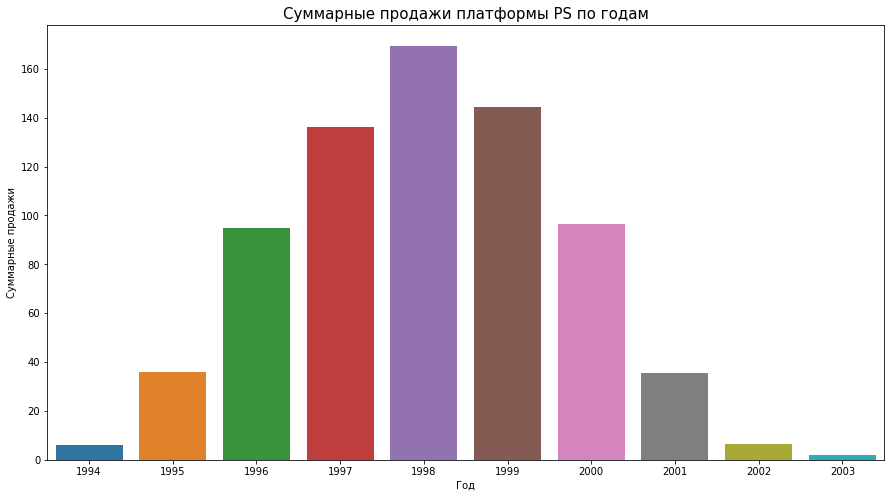

In [30]:
# график для платформы PS
plt.figure(figsize=(15,8))
sns.barplot(data=top_platforms_years_PS, x='year_of_release', y='total_sales')
plt.title('Суммарные продажи платформы PS по годам',fontsize=15)
plt.xlabel('Год',fontsize=10)
plt.ylabel('Суммарные продажи',fontsize=10);


Вывод по графику для платформы PS:

Год начала продаж - 1994. Лучшие продажи 1996 - 2000. Год окончательного спада продаж 2003.<br>

**Промежуточный вывод по разделу 2.1:**<br>

Исходя из данных, представленных для анализа, начиная с 1995 г. число выпущенных игр на различных игровых платформах показывало рост, достиг пика в 2007-2008 г. и далее пошло на спад. Наибольшие суммарные продажи за весь период показали платформы PS2, X360, PS3, Wii, DS и PS. Характерный срок жизни игровой платформы - 10 лет. При этом пиковые значения продаж платформа показывает на протяжении 5 лет.<br>

Крупные участники игрового рынка показывали отличные продажи в прошлом, но последние ощутимые продажи игр были более 10 лет назад. Чтобы эти данные не искажали дальнейшее исследование, установим актуальный период - с 2013 г. Этот период будем использовать при дальнейшем анализе.<br>

#### Определим потенциально прибыльные платформы.

Сначала необходимо отфильтровать данные за актуальный период, выведенный в разделе 2.1 - с 2013 г. Перезапишем датафрейм, исключив игры с годом выпуска ранее 2013 г. 

In [31]:
# перезапишем датафрейм - исключим игры, выпущенные ранее 2005 г.
df_since_2013 = df.loc[df['year_of_release'] >= 2013]
# проверим, какие годы остались в датафрейме
print(df_since_2013['year_of_release'].unique())
df

<IntegerArray>
[2013, 2015, 2014, 2016]
Length: 4, dtype: Int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


Проверим, какие платформы остались в датасете. 

In [32]:
print(df_since_2013['platform'].unique())

['PS3' 'X360' 'PS4' '3DS' 'XOne' 'WiiU' 'Wii' 'PC' 'PSV' 'DS' 'PSP']


Вновь рассмотрим суммарные продажи по платформам, только уже за актуальный период.

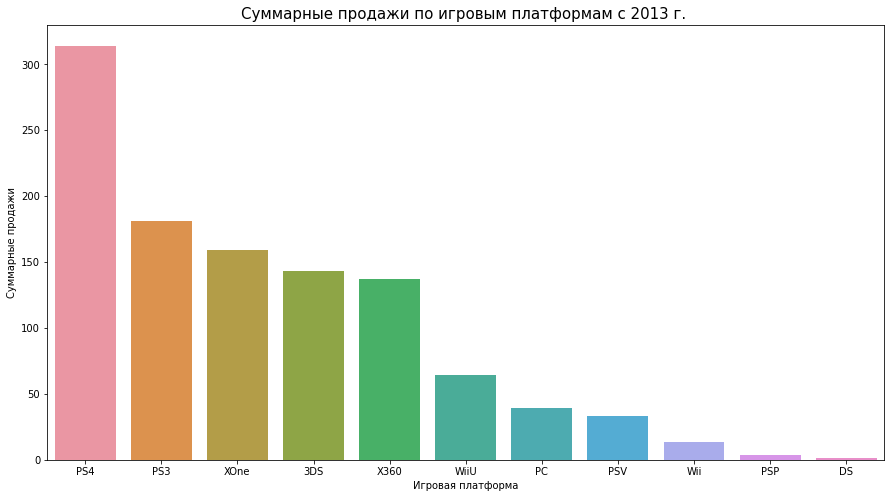

In [33]:
# создадим сводную таблицу по игровым платформам и их суммарным продажам и запишем в переменную platform_sales
platform_sales = df_since_2013.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
# строим столбчатую диаграмму по сводной таблице platform_sales
plt.figure(figsize=(15,8))
sns.barplot(data=platform_sales, x='platform', y='total_sales')
plt.title('Суммарные продажи по игровым платформам c 2013 г. ',fontsize=15)
plt.xlabel('Игровая платформа',fontsize=10)
plt.ylabel('Суммарные продажи',fontsize=10);

Когда мы отфильтровали год выпуска игр, диаграмма суммарных продаж по платформам изменилась. Теперь мы можем видеть абсолютного лидера - PS4, и 4 платформы, следующих за ним - PS3, XOne, 3DS и X360. 

Подготовим сводную таблицу по платформам и суммарным продажам по годам.

In [34]:
# создаем сводную таблицу по платформам и суммарным продажам по годам

all_platform_sales = df_since_2013.pivot_table(
    index=['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()

Строим графики лидирующих по продажам 5 платформам.

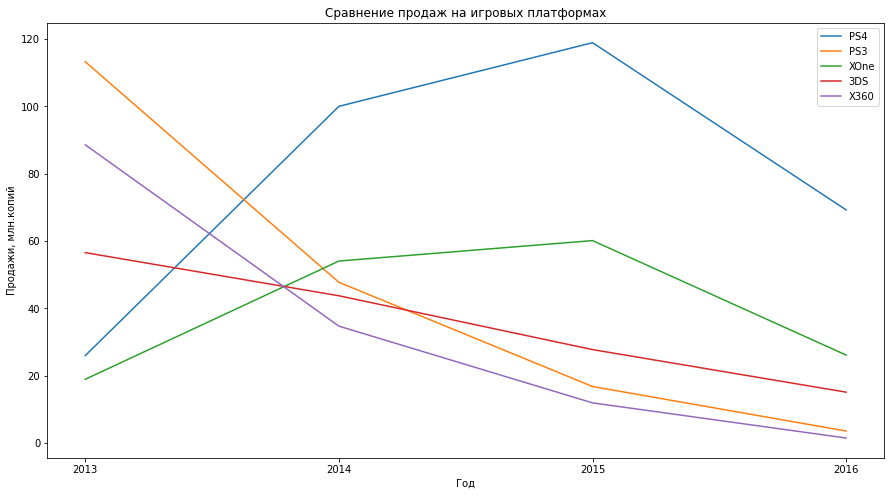

In [35]:
# подготовим переменные
plat_PS4_sales = all_platform_sales.loc[all_platform_sales['platform'] == 'PS4']
plat_PS3_sales = all_platform_sales.loc[all_platform_sales['platform'] == 'PS3']
plat_XOne_sales = all_platform_sales.loc[all_platform_sales['platform'] == 'XOne']
plat_3DS_sales = all_platform_sales.loc[all_platform_sales['platform'] == '3DS']
plat_X360_sales = all_platform_sales.loc[all_platform_sales['platform'] == 'X360']

# сохраняем оси графика для ps4
ax = plat_PS4_sales.plot(
    x = 'year_of_release',
    y = 'total_sales',
    label = 'PS4',
    figsize = (15,8))

# строим остальные графики на оси ax
plat_PS3_sales.plot(
    x = 'year_of_release',
    y = 'total_sales',
    label = 'PS3',
    ax=ax)

plat_XOne_sales.plot(
    x = 'year_of_release',
    y = 'total_sales',
    label = 'XOne',
    ax=ax)

plat_3DS_sales.plot(
    x = 'year_of_release',
    y = 'total_sales',
    label = '3DS',
    ax=ax)

plat_X360_sales.plot(
    x = 'year_of_release',
    y = 'total_sales',
    label = 'X360',
    ax=ax)

plt.ylabel('Продажи, млн.копий')
plt.xlabel('Год')
plt.title('Сравнение продаж на игровых платформах')
plt.xticks(all_platform_sales['year_of_release'].unique());

Платформы X360 и PS3 показывают резкий спад и уже в 2015 году составляют менее 20 млн копий. Платформы PS4 и XOne показывают рост и отличные продажи до 2015 года. Платформа 3DS показывает небольшой спад, но продажи достаточно стабильны. За 2016 год данные могут быть неполными, поэтому наблюдается спад у всех платформ.

Построим графики для остальных платформ. 

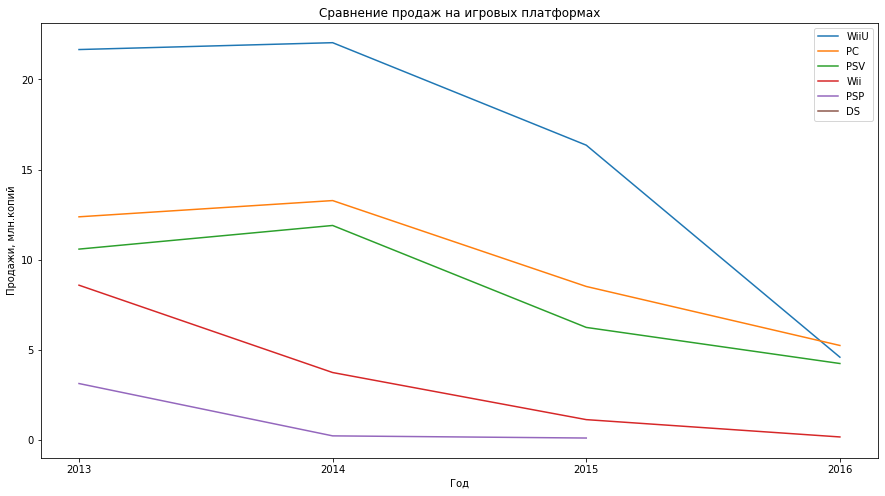

In [36]:
# подготовим переменные
plat_WiiU_sales = all_platform_sales.loc[all_platform_sales['platform'] == 'WiiU']
plat_PC_sales = all_platform_sales.loc[all_platform_sales['platform'] == 'PC']
plat_PSV_sales = all_platform_sales.loc[all_platform_sales['platform'] == 'PSV']
plat_Wii_sales = all_platform_sales.loc[all_platform_sales['platform'] == 'Wii']
plat_PSP_sales = all_platform_sales.loc[all_platform_sales['platform'] == 'PSP']
plat_DS_sales = all_platform_sales.loc[all_platform_sales['platform'] == 'DS']


# сохраняем оси графика для ps4
ax = plat_WiiU_sales.plot(
    x = 'year_of_release',
    y = 'total_sales',
    label = 'WiiU',
    figsize = (15,8))

# строим остальные графики на оси ax
plat_PC_sales.plot(
    x = 'year_of_release',
    y = 'total_sales',
    label = 'PC',
    ax=ax)

plat_PSV_sales.plot(
    x = 'year_of_release',
    y = 'total_sales',
    label = 'PSV',
    ax=ax)

plat_Wii_sales.plot(
    x = 'year_of_release',
    y = 'total_sales',
    label = 'Wii',
    ax=ax)

plat_PSP_sales.plot(
    x = 'year_of_release',
    y = 'total_sales',
    label = 'PSP',
    ax=ax)

plat_DS_sales.plot(
    x = 'year_of_release',
    y = 'total_sales',
    label = 'DS',
    ax=ax)

plt.ylabel('Продажи, млн.копий')
plt.xlabel('Год')
plt.title('Сравнение продаж на игровых платформах')
plt.xticks(all_platform_sales['year_of_release'].unique());

Стоит обратить внимание на платформы WiiU и PC и PSV в дальнейшем анализе. Продажи ниже, чем у лидеров, но платформы достаточно стабильны. 

Рассмотрим, как распределены данные о продах игр на различных платформах с помощью диаграммы размаха. 

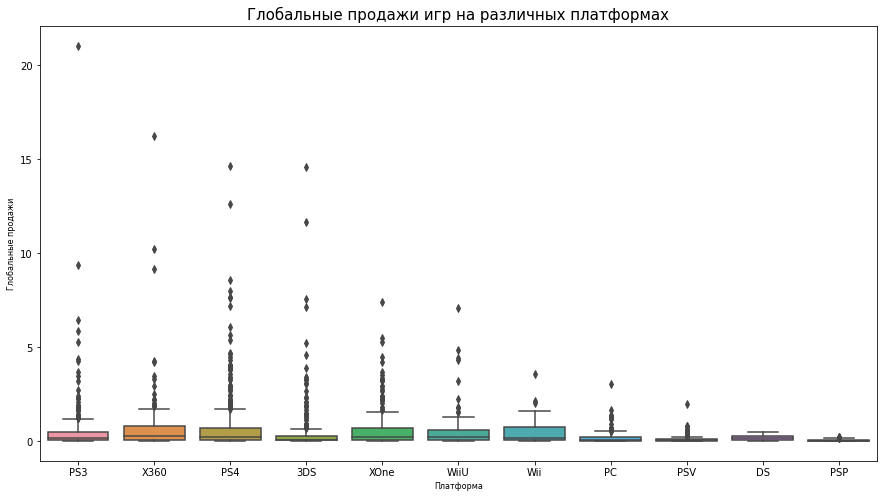

In [37]:
# строим ящик с усами boxplot
plt.figure(figsize=(15,8))
sns.boxplot(data=df_since_2013, x='platform', y='total_sales')
plt.title('Глобальные продажи игр на различных платформах', fontsize=15)
plt.xlabel('Платформа', fontsize=8)
plt.ylabel('Глобальные продажи',fontsize=8);


На графике видны выбросы практически на всех платформах. Применим масштабирование и рассмотрим график подробнее. 

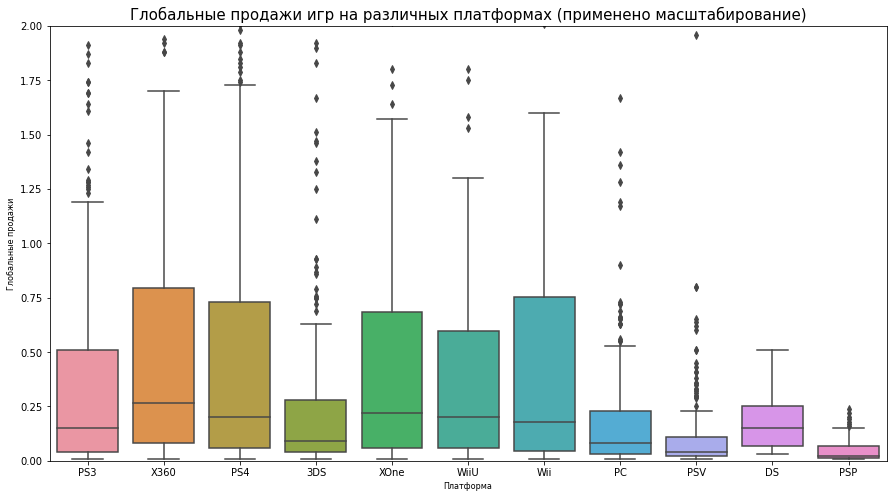

In [38]:
# строим ящик с усами boxplot
plt.figure(figsize=(15,8))
sns.boxplot(data=df_since_2013, x='platform', y='total_sales').set_ylim([0,2])
plt.title('Глобальные продажи игр на различных платформах (применено масштабирование)', fontsize=15)
plt.xlabel('Платформа', fontsize=8)
plt.ylabel('Глобальные продажи',fontsize=8);

Выше всех лежит медиана платформы X360. Близки к ней медианы платформ PS4, XOne, WiiU, WiiU, PS3. Платформу PSV ранее мы выделяли как стабильную, но на графике видно, что её медиана одна из самых низких, для массовых продаж она не подходит. 

Если платформы показывали хорошие продажи в прошлом, это не значит, что можно назвать их потенциально прибыльными. Ранее мы определили срок жизни платформы - 10 лет. Посмотрим, когда были выпущены платформы, чтобы соотнести эти данные с результатами провёденного исследования.<br>
Ранее мы определили, что платформы могут показывать наилучшие продажи на протяжении 5 лет. Поэтому установим границу, что платформа должна "жить" не менее чем до 2021 года, чтобы оказаться потенциально прибыльной.

In [39]:
# посчитаем ожидаемый год "смерти" платформы, и отфильтруем значения - платформа должна быть "живучей" не менее 5 лет с 2016 г.
platforms_alive = df.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = 'min').reset_index()
platforms_alive['expected_year_of_death'] = platforms_alive['year_of_release'] + 10
platforms_alive = platforms_alive.loc[platforms_alive['expected_year_of_death'] >= 2021]
platforms_alive

,platform,year_of_release,expected_year_of_death
2,3DS,2011,2021
18,PS4,2013,2023
20,PSV,2011,2021
27,WiiU,2012,2022
30,XOne,2013,2023


Ранее на графиках мы видели, что платформы X360 и PS3 занимали значительную долю общих продаж. Однако нельзя включить их в список потенциально прибыльных после 2016 г., т.к. срок жизни этих платформ уже подошёл к концу. 

**Промежуточный вывод по разделу 2.2:**

Самые большие продажи за период с 2013 г. показывали платформы PS4, PS3, XOne, 3DS и X360. Однако не каждую из них можно назвать потенциально прибыльной. Платформы PS4 и X360 уже прошли жизненный цикл, и маловероятно будут жизнеспособны после 2016 года. Платформы PS4 и XOne показывали высокие продажи до 2015 года, и их жизненый цикл все ещё не закончен. Платформы 3DS и  WiiU показали меньшие продажи, но достаточно стабильные. Платформа PSV, хотя и будет потенциально "жива" к 2021 г., продажи по ней были одни из самых худших, поэтому не будем включать её в потенциально прибыльные. И отдельно стоит отметить платформу PC - ранее был сделан вывод, что данные по этой платформе не полные. 30 летняя история персональных компьютеров показывает, что нет платформы, которая была бы более стабильна (персональный компьютер есть практически у каждого человека).<br>
Таким образом, потенциально прибыльными платформами можно назвать: PS4, XOne, 3DS, WiiU, PC.

#### Рассмотрим, как отзывы пользователей и критиков влияют на продажи.


Для анализа возьмем одну из популярных платформ - PS4. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Ранеее были выявлены пропуски в оценках пользователей и критиков. Мы не стали удалять эти данные, т.к. их более 40%, но также решили, что заполнять их будет некорректно, т.к. мы не знаем, какую субъективную оценку пользователь дал конкретной игре. Чтобы оценить корреляцию, на этом этапе исследования удалим пропуски и запишем данные в переменную df_notna. Будем работать только с данными об играх, получивших оценку пользователей. 

In [40]:
# удаляем пропуски
df_notna = df.dropna()
# проверяем наличие пропусков
print(df_notna.isna().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64


**Оценим корреляцию между оценками пользователей и продажами для платформы PS4 (игровая консоль)**

In [41]:
# корреляция между оценками пользователей и продажами 
platform_PS4_data = df_notna[df_notna['platform']=='PS4']
print('Корреляция между оценками пользователей и продажами для платформы PS4 равна:')
platform_PS4_data['user_score'].corr(platform_PS4_data['total_sales'])

Корреляция между оценками пользователей и продажами для платформы PS4 равна:


-0.03362497596528878

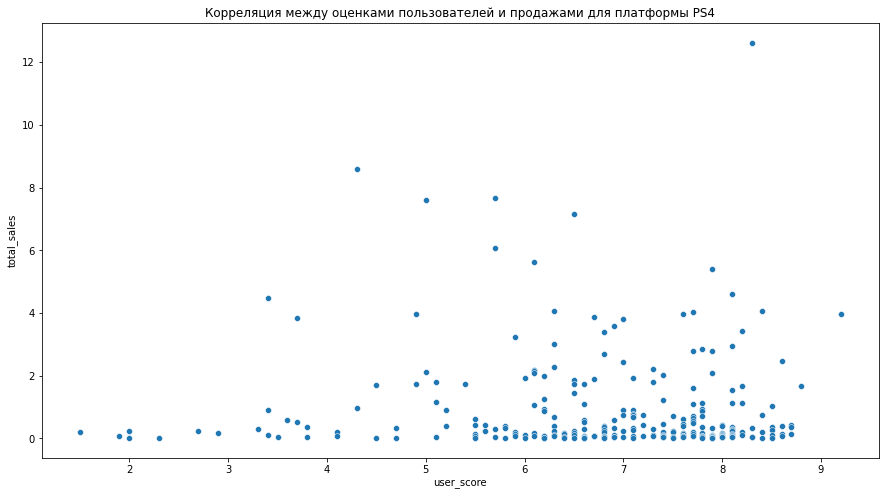

In [42]:
# построим диаграмму рассеяния
plt.figure(figsize=(15,8))
sns.scatterplot(x='user_score', y='total_sales', data=platform_PS4_data)
plt.title('Корреляция между оценками пользователей и продажами для платформы PS4');

Корреляция близка к нулю. Можно сделать вывод, что оценки пользователей не влияют на продажи внутри платформы. 

**Оценим корреляцию между оценками критиков и продажами для платформы PS4 (игровая консоль)**

In [43]:
# корреляция между оценками пользователей и продажами  
print('Корреляция между оценками критиков и продажами для платформы PS4 равна:')
platform_PS4_data['critic_score'].corr(platform_PS4_data['total_sales'])

Корреляция между оценками критиков и продажами для платформы PS4 равна:


0.40589480145836687

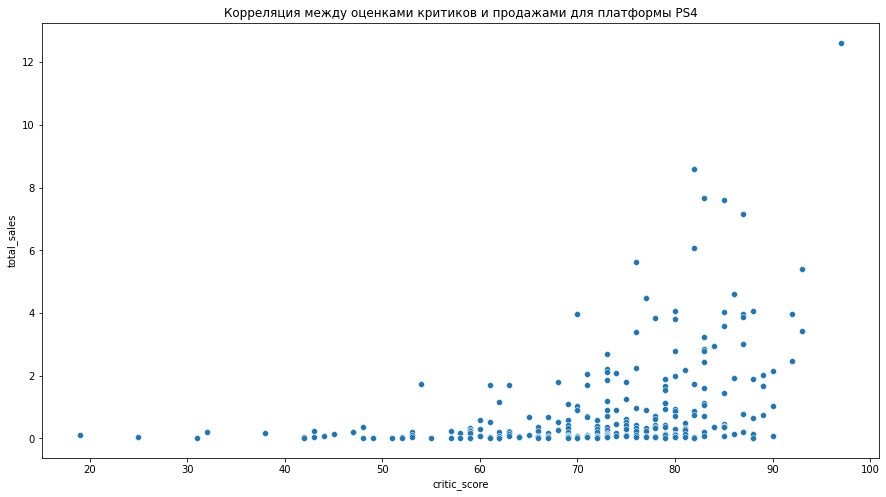

In [44]:
# построим диаграмму рассеяния
plt.figure(figsize=(15,8))
sns.scatterplot(x='critic_score', y='total_sales', data=platform_PS4_data)
plt.title('Корреляция между оценками критиков и продажами для платформы PS4');

Корреляция 0,4 говорит о наличи взаимосвязи, однако не слишком сильной. Высокая оценка критиков влияет на продажи игр внутри платформы, но так бывает не всегда. 

3) Рассмотрим другие типы платформ.  

**Оценим корреляцию между оценками пользователей и продажами для платформы 3DS (портативная консоль)**

In [45]:
# корреляция между оценками пользователей и продажами 
platform_3DS_data = df_notna[df_notna['platform']=='3DS']
print('Корреляция между оценками пользователей и продажами для платформы 3DS равна:')
platform_3DS_data['user_score'].corr(platform_3DS_data['total_sales'])

Корреляция между оценками пользователей и продажами для платформы 3DS равна:


0.23208872237663558

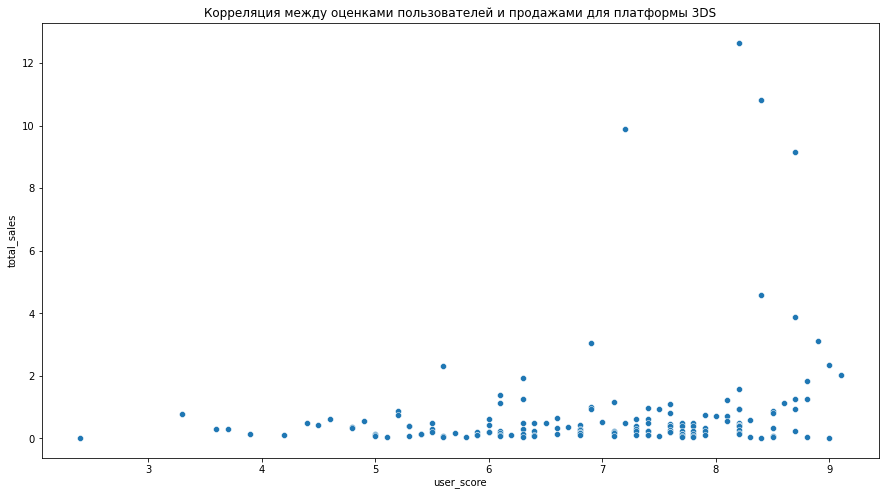

In [46]:
# построим диаграмму рассеяния
plt.figure(figsize=(15,8))
sns.scatterplot(x='user_score', y='total_sales', data=platform_3DS_data)
plt.title('Корреляция между оценками пользователей и продажами для платформы 3DS');

Корреляция равна 0.23. В случае с портативной консолью, взаимосвязь между оценками пользователей и продажами игр несколько выше, чем в случае с игровой консолью. 

**Оценим корреляцию между оценками критиков и продажами для платформы 3DS (портативная консоль)**

In [47]:
# корреляция между оценками критиков и продажами 
platform_3DS_data = df_notna[df_notna['platform']=='3DS']
print('Корреляция между оценками критиков и продажами для платформы 3DS равна:')
platform_3DS_data['critic_score'].corr(platform_3DS_data['total_sales'])

Корреляция между оценками критиков и продажами для платформы 3DS равна:


0.33890386446332155

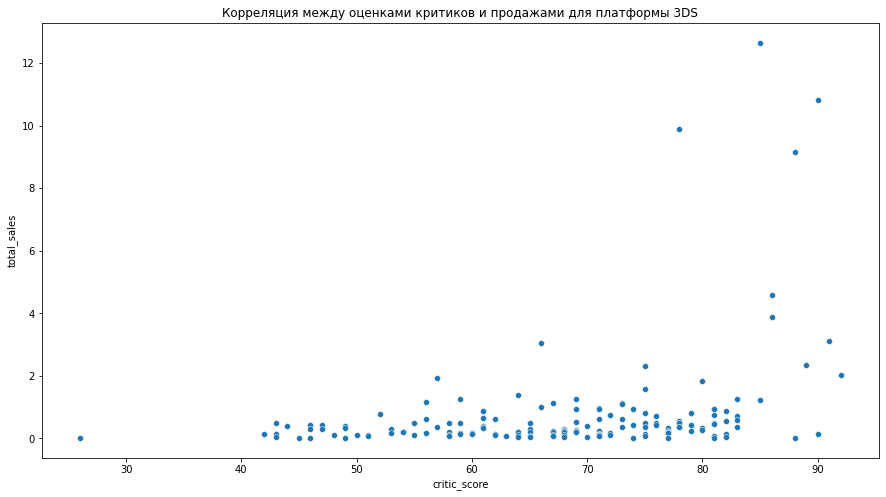

In [48]:
# построим диаграмму рассеяния
plt.figure(figsize=(15,8))
sns.scatterplot(x='critic_score', y='total_sales', data=platform_3DS_data)
plt.title('Корреляция между оценками критиков и продажами для платформы 3DS');

Корреляция 0,34 говорит о наличи взаимосвязи, однако не слишком сильной. Высокая оценка критиков влияет на продажи игр внутри платформы, но так бывает не всегда. 

**Оценим корреляцию между оценками пользователей и продажами для платформы PC (персональный компьютер)**

In [49]:
# корреляция между оценками пользователей и продажами 
platform_PC_data = df_notna[df_notna['platform']=='PC']
print('Корреляция между оценками пользователей и продажами для платформы PC равна:')
platform_PC_data['user_score'].corr(platform_PC_data['total_sales'])

Корреляция между оценками пользователей и продажами для платформы PC равна:


0.0035962323378451056

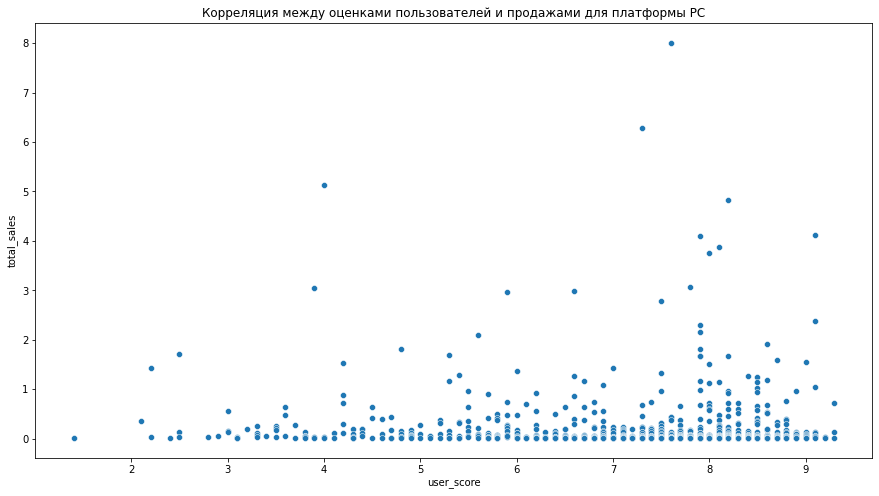

In [50]:
# построим диаграмму рассеяния
plt.figure(figsize=(15,8))
sns.scatterplot(x='user_score', y='total_sales', data=platform_PC_data)
plt.title('Корреляция между оценками пользователей и продажами для платформы PC');

Корреляция близка к нулю. Взаимосвязь между оценками пользователей и продажами игр для платформы PC отсутствует. 

**Оценим корреляцию между оценками критиков и продажами для платформы PC (персональный компьютер)**

In [51]:
# корреляция между оценками критиков и продажами 
platform_PC_data = df_notna[df_notna['platform']=='PC']
print('Корреляция между оценками критиков и продажами для платформы PC равна:')
platform_PC_data['critic_score'].corr(platform_3DS_data['total_sales'])

Корреляция между оценками критиков и продажами для платформы PC равна:


nan

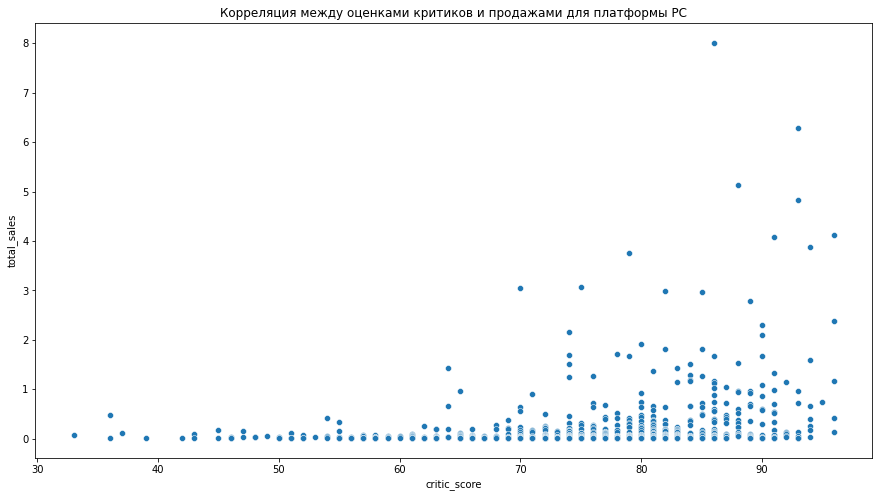

In [52]:
# построим диаграмму рассеяния
plt.figure(figsize=(15,8))
sns.scatterplot(x='critic_score', y='total_sales', data=platform_PC_data)
plt.title('Корреляция между оценками критиков и продажами для платформы PC');

Корреляция 0,26 говорит о наличи взаимосвязи, однако не слишком сильной. Высокая оценка критиков влияет на продажи игр внутри платформы, но так бывает не всегда.

**Промежуточный вывод по разделу 2.3:**<br>

Оценки пользователей, как правило, не влияют на продажи игр. Однако в случае отдельных видов игровых платформ, может слабо прослеживаться. Взаимосвязь между оценками критиков и продажами установлена - чем выше оценка, тем больше продаж, но так бывает не всегда. 

#### Рассмотрим взаимосвязи между жанрами игр и продажами. 

In [53]:
# создадим сводную таблицупо жанрам игр и их проджам и запишем в переменную game_genre_sales
game_genre_sales = df.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
game_genre_sales

,genre,total_sales
0,Action,1716.50
1,Sports,1309.67
2,Shooter,1041.36
3,Role-Playing,931.08
4,Platform,825.55
5,Misc,790.29
6,Racing,723.49
7,Fighting,442.66
8,Simulation,387.96
9,Puzzle,239.89


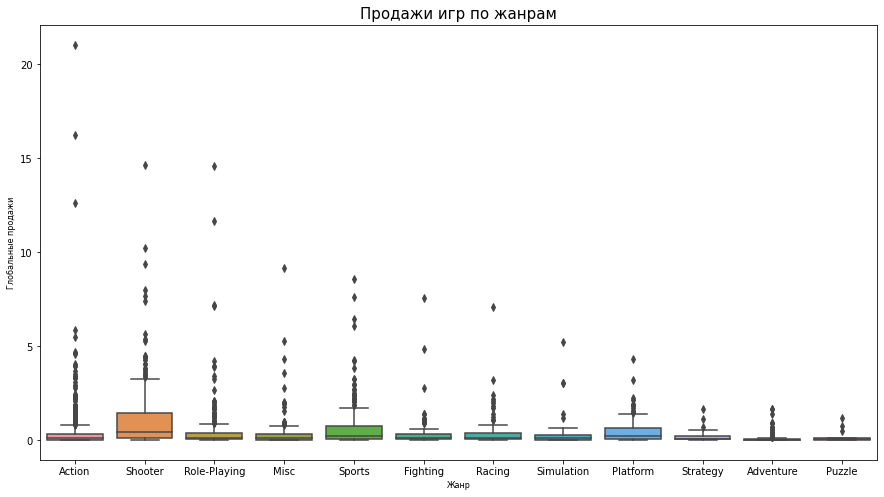

In [54]:
# строим ящик с усами boxplot
plt.figure(figsize=(15,8))
sns.boxplot(data=df_since_2013, x='genre', y='total_sales')
plt.title('Продажи игр по жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=8)
plt.ylabel('Глобальные продажи',fontsize=8);

На графике видны выбросы. Больше всего в жанрах Action, Shooter, Role-Playing.

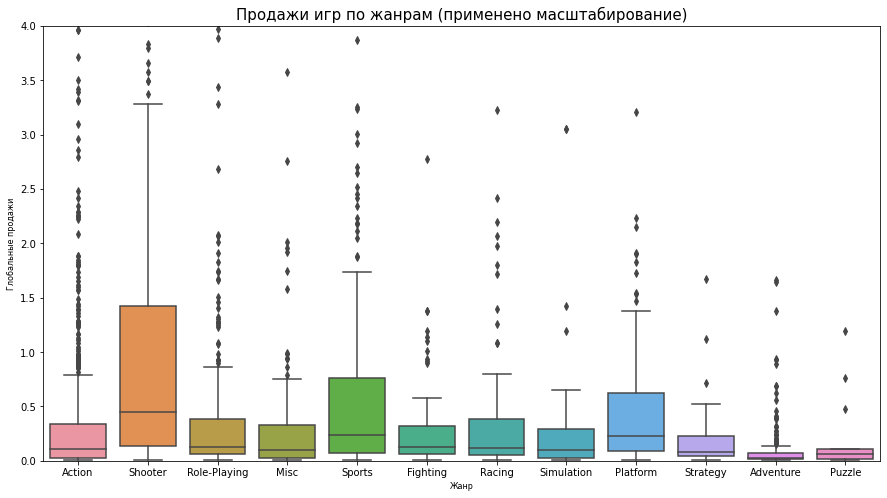

In [55]:
# строим ящик с усами boxplot
plt.figure(figsize=(15,8))
sns.boxplot(data=df_since_2013, x='genre', y='total_sales').set_ylim([0,4])
plt.title('Продажи игр по жанрам (применено масштабирование)', fontsize=15)
plt.xlabel('Жанр', fontsize=8)
plt.ylabel('Глобальные продажи',fontsize=8);

**Промежуточный вывод по разделу 2.4:**<br>
Выше всех лежит медиана у игр с жанром Шутер, далее Cпорт и Платформер. Ниже относительно них медианы жанров Экшен, Ролевая Игра, Файтинг, Гонки, Симуляторы и Стратегии. Ниже всех медианы жанров Приключения и Пазл. <br>

Из наиболее крупных медиан, наиболее стабильна и имеет более длинный ряд успешно продающихся игр у жанра Шутер. Топ 5 можно определить, как: Shooter, Sports, Platform, Role-Playing и Racing.


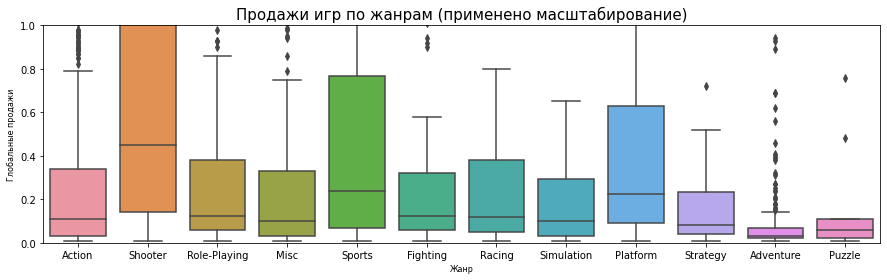

In [56]:
# строим ящик с усами boxplot
plt.figure(figsize=(15,4))
sns.boxplot(data=df_since_2013, x='genre', y='total_sales').set_ylim([0,1])
plt.title('Продажи игр по жанрам (применено масштабирование)', fontsize=15)
plt.xlabel('Жанр', fontsize=8)
plt.ylabel('Глобальные продажи',fontsize=8);

**Вывод по разделу 2:**<br>

Был установлен актуальный период для анализа данных - с 2013 г. Был определен характерный срок жизни игровой платформы - 10 лет. При этом пиковые значения продаж платформа показывает на протяжении 5 лет. Потенциально прибыльными определены платформы потенциально прибыльными платформами можно назвать: PS4, XOne, 3DS, WiiU, PC. Были проверены взаимосвязи между оценками критиков и пользователей и продажами игр. В результате этой проверки было определено, что пользователи склонны полагаться на оценки критиков, а не на оценку других пользователей. Тем не менее, оценка критиков не является единствинным фактором для хороших продаж игры. Взаимосвязь между оценками пользователей и продажами игр может различаться в зависимости от типа платформы. Самый прибыльный жанр игры - Шутер. Наименее прибыльные - Приключения и Пазл игры.<br>

В ходе дальнейшего исследования необходимо рассмотреть данные в разрезе по регионам:<br>
1) Самые популярные платформы (топ-5).<br> 
2) Самые популярные жанры (топ-5).<br>
3) Определить, влияет ли рейтинг ESRB на продажи в отдельном регионе. 

### Портрет пользователя каждого региона.

**Предпочтения пользователей по платформе**

1) Рассмотрим, как выглядел рынок платформ в 2014 году. 

In [57]:
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

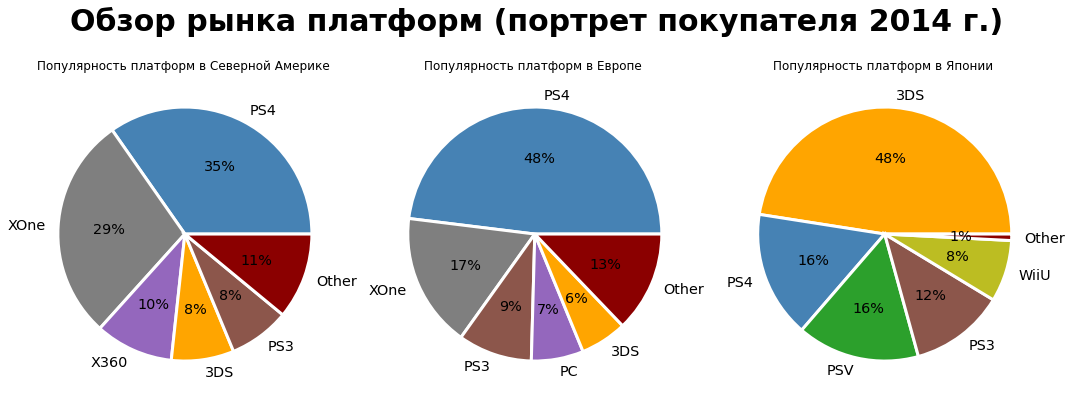

In [58]:
# check
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя 2014 г.)', fontsize = 30, fontweight='bold')

x_year = 2014

graph(df, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(df, x_year,'eu_sales', 'Европе', axes[1])
graph(df, x_year, 'jp_sales', 'Японии', axes[2])

На графике видно, какие платформы были популярны среди пользователей разных регионов в 2014 г. Среди этих платформ есть те, которые хотя и составляют значимую долю рынка, уже довольно старые и по нашим рассчётам уже не будут прибыльными в дальнейшем.

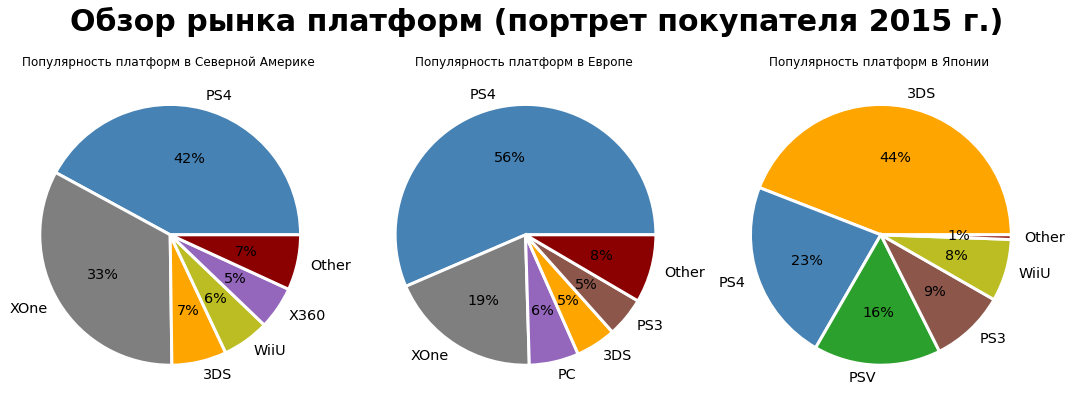

In [59]:
# check
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя 2015 г.)', fontsize = 30, fontweight='bold')

x_year = 2015

graph(df, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(df, x_year,'eu_sales', 'Европе', axes[1])
graph(df, x_year, 'jp_sales', 'Японии', axes[2])

За 1 год лидеры рынка выросли на 4-7%. Популярность старых платформ снизилась, появились новые платформы.

2) Ранее мы выделили потенциально прибыльные платформы. Рассмотрим, как распределены они. 

In [60]:
# фильтруем нужные годы и платформы
df_since_2014 = df.loc[df['year_of_release'] >= 2014]

In [61]:
# запишем в новый столбец интересубщие нас платформы
df_since_2014['top_platform'] = df_since_2014['platform']
# функция возвращает other если платформа нас не интересует
def categorize_platform(row):
    try:
        if 'PS4' in row:
            return 'PS4'
        elif 'XOne' in row:
            return 'XOne'
        elif '3DS' in row:
            return '3DS'
        elif 'WiiU' in row:
            return 'WiiU'
        elif 'PC' in row:
            return 'PC'
        else:
            return 'other'
    except:
        return 'other'
df_since_2014['top_platform'] = df_since_2014['top_platform'].apply(categorize_platform)
df_since_2014['top_platform'].unique()

/tmp/ipykernel_1039/2787080896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_since_2014['top_platform'] = df_since_2014['platform']
/tmp/ipykernel_1039/2787080896.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_since_2014['top_platform'] = df_since_2014['top_platform'].apply(categorize_platform)


array(['PS4', '3DS', 'XOne', 'WiiU', 'other', 'PC'], dtype=object)

In [62]:
# сводная таблица для региона NA, платформа
region_NA_platform = df_since_2014.pivot_table(
    index='top_platform', values = 'na_sales', aggfunc = 'sum').reset_index().sort_values(by = 'na_sales')
# сводная таблица для региона EU, платформа
region_EU_platform = df_since_2014.pivot_table(
    index='top_platform', values = 'eu_sales', aggfunc = 'sum').reset_index().sort_values(by = 'eu_sales')
# сводная таблица для региона JP, платформа
region_JP_platform = df_since_2014.pivot_table(
    index='top_platform', values = 'jp_sales', aggfunc = 'sum').reset_index().sort_values(by = 'jp_sales')

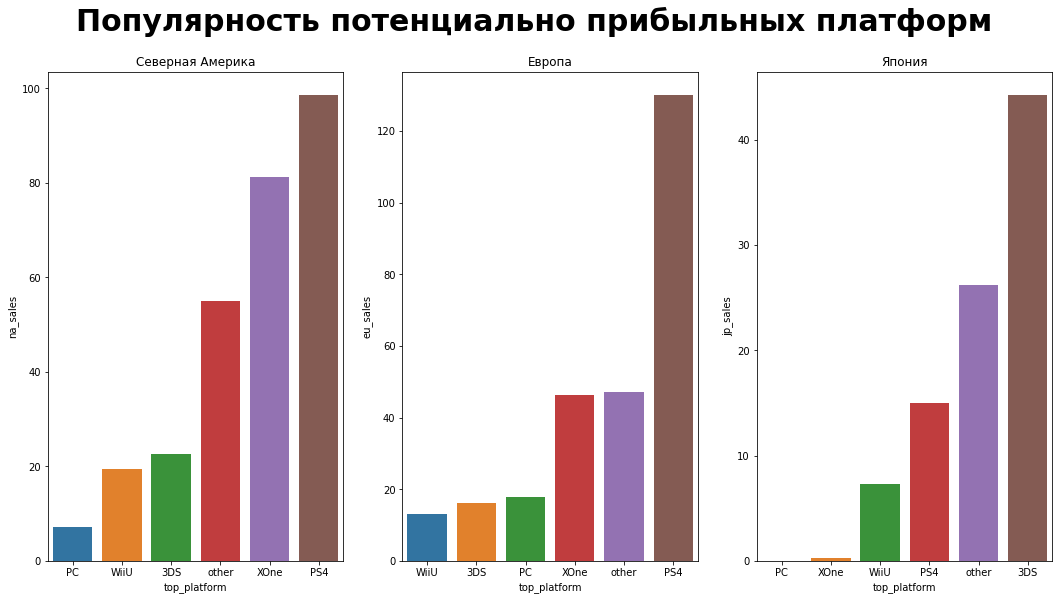

In [63]:
# строим график методом subplot
plt.figure(figsize = (18,9))
plt.suptitle("Популярность потенциально прибыльных платформ", fontsize = 30, fontweight='bold')
plt.subplot(1,3,1).set_title('Северная Америка')
sns.barplot(data = region_NA_platform , x = 'top_platform', y = 'na_sales')
plt.subplot(1,3,2).set_title('Европа')
sns.barplot(data = region_EU_platform , x = 'top_platform', y = 'eu_sales')
plt.subplot(1,3,3).set_title('Япония')
sns.barplot(data = region_JP_platform, x = 'top_platform', y = 'jp_sales');

На графике видно, как распределены интересующие нас, потенциально прибыльные платформы, относительно тех (столбец other), которые потеряют популярность к 2017 г, учитывая жизненный цикл платформы. 

Для региона Северная Америка топ 5 платформ распределен как: PS4, XOne, 3DS, WiiU, PC. Наиболее популярны PS4 и XOne.<br>
Для региона Европа топ 5 платформ распределен как: PS4, XOne, PC, 3DS, WiiU.Наиболее популярна PS4.<br>
Для региона Япония топ 5 платформ распределен как: 3DS, PS4, Wii, XOne, PC. Наиболее популярна 3DS.<br>

**Предпочтения пользователей по жанру**

1) Напишем функцию, которая проверит название каждого жанра, и если она не входит в список топ5, перезапишет жанр как other. 

In [64]:
# запишем в новый столбец интересубщие нас жанры
df_since_2014['top_genre'] = df_since_2014['genre']
# функция возвращает other если платформа нас не интересует
def categorize_platform(row):
    try:
        if 'Shooter' in row:
            return 'Shooter'
        elif 'Sports' in row:
            return 'Sports'
        elif 'Platform' in row:
            return 'Platform'
        elif 'Role-Playing' in row:
            return 'Role-Playing'
        elif 'Racing' in row:
            return 'Racing'
        else:
            return 'other'
    except:
        return 'other'
df_since_2014['top_genre'] = df_since_2014['top_genre'].apply(categorize_platform)
df_since_2014['top_genre'].unique()

/tmp/ipykernel_1039/10181803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_since_2014['top_genre'] = df_since_2014['genre']
/tmp/ipykernel_1039/10181803.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_since_2014['top_genre'] = df_since_2014['top_genre'].apply(categorize_platform)


array(['Shooter', 'other', 'Role-Playing', 'Sports', 'Racing', 'Platform'],
      dtype=object)

In [65]:
# подготовим данные для графиков
na_genre = df_since_2014.pivot_table(
    index = 'top_genre', values = 'na_sales', aggfunc = 'sum').reset_index().sort_values(by = 'na_sales')
eu_genre = df_since_2014.pivot_table(
    index = 'top_genre', values = 'eu_sales', aggfunc = 'sum').reset_index().sort_values(by = 'eu_sales')
jp_genre = df_since_2014.pivot_table(
    index = 'top_genre', values = 'jp_sales', aggfunc = 'sum').reset_index().sort_values(by = 'jp_sales')

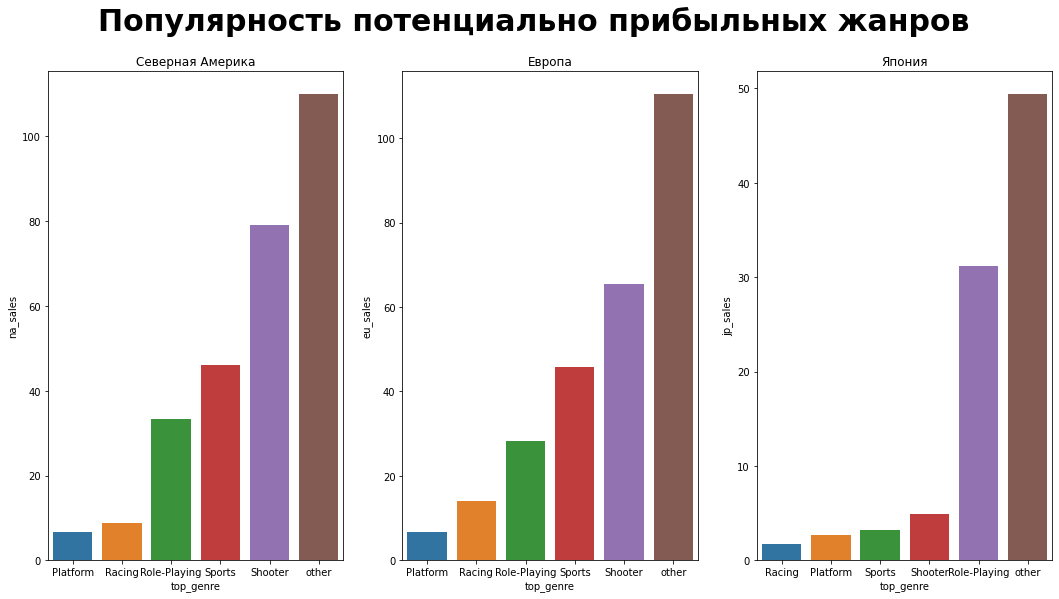

In [66]:
# строим график методом subplot
plt.figure(figsize = (18,9))
plt.suptitle("Популярность потенциально прибыльных жанров", fontsize = 30, fontweight='bold')
plt.subplot(1,3,1).set_title('Северная Америка')
sns.barplot(data = na_genre , x = 'top_genre', y = 'na_sales')
plt.subplot(1,3,2).set_title('Европа')
sns.barplot(data = eu_genre , x = 'top_genre', y = 'eu_sales')
plt.subplot(1,3,3).set_title('Япония')
sns.barplot(data = jp_genre , x = 'top_genre', y = 'jp_sales');

На графике видно, как топ-5 потенциально прибыльных жанров распределены относительно друг друга и других жанров в различных регионах. Не смотря на то, что топ-5 приносит значительную выручку, от других жанров также не стоит отказываться.

Для региона Северная Америка топ 5 прибыльных жанров распределен как: Shooter, Sports, Role-Playing, Racing, Platform.<br>
Для региона Европа топ прибыльных 5 жанров распределен как: Shooter, Sports, Role-Playing, Racing, Platform.<br> 
Для региона Япония топ 5 прибыльных жанров распределен как: Role-Playing, Shooter, Sports, Platform, Racing.

2) Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [67]:
# сводная таблица для региона NA, рейтинг
region_NA_rating = df_since_2014.pivot_table(
    index='rating', values = 'na_sales', aggfunc = 'sum').reset_index().sort_values(by = 'na_sales')
# сводная таблица для региона EU, рейтинг
region_EU_rating = df_since_2014.pivot_table(
    index='rating', values = 'eu_sales', aggfunc = 'sum').reset_index().sort_values(by = 'eu_sales')
# сводная таблица для региона JP, рейтинг
region_JP_rating = df_since_2014.pivot_table(
    index='rating', values = 'jp_sales', aggfunc = 'sum').reset_index().sort_values(by = 'jp_sales')

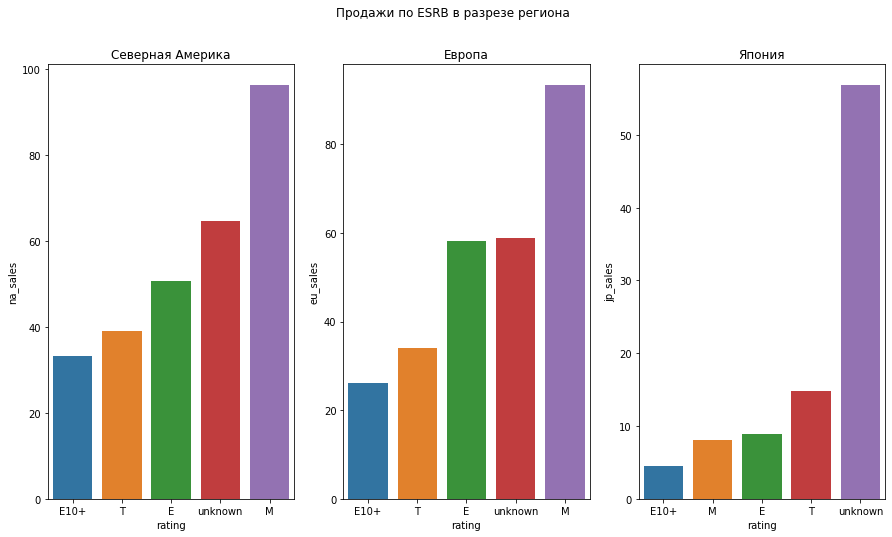

In [68]:
# строим график методом subplot
plt.figure(figsize = (15,8))
plt.suptitle("Продажи по ESRB в разрезе региона")
plt.subplot(1,3,1).set_title('Северная Америка')
sns.barplot(data = region_NA_rating , x = 'rating', y = 'na_sales')
plt.subplot(1,3,2).set_title('Европа')
sns.barplot(data = region_EU_rating , x = 'rating', y = 'eu_sales')
plt.subplot(1,3,3).set_title('Япония')
sns.barplot(data = region_JP_rating , x = 'rating', y = 'jp_sales');

В Северной Америке и Европе преобладают продажи игр с рейтингом M (для взрослых). В Японии - с рейтингом unknown. Рейтинг ESRB испоьзуеся на играх, выпущенных в США и Канаде. Японцы с большей вероятностью предпочитают локальных производителей игр, возрастное ограничение проследить нельзя. Также мы видим, что второе место в Японии занимают игры с рейтингом Т (для подростков). 

**Вывод по разделу 3:**<br>

При анализе подаж в разрезе платформ, жанров и возрастного рейтинга относительно регионов было выявлено, что регион JP - Япония - существенно отличается поведением пользователя относительно других регионов. <br>

Для региона Северная Америка топ 5 платформ распределен как: PS4, XOne, 3DS, WiiU, PC. Наиболее популярны PS4 и XOne.<br>
Для региона Европа топ 5 платформ распределен как: PS4, XOne, PC, 3DS, WiiU.<br> Наиболее популярна PS4.<br>
Для региона Япония топ 5 платформ распределен как: 3DS, PS4, Wii, XOne, PC. Наиболее популярна 3DS.<br>

Для региона Северная Америка топ 5 прибыльных жанров распределен как: Shooter, Sports, Role-Playing, Racing, Platform.<br>
Для региона Европа топ прибыльных 5 жанров распределен как: Shooter, Sports, Role-Playing, Racing, Platform.<br> 
Для региона Япония топ 5 прибыльных жанров распределен как: Role-Playing, Shooter, Sports, Platform, Racing.<br>


В Северной Америке и Европе преобладают продажи игр с рейтингом M (для взрослых). В Японии - преобладают продажи игр без определения категории рейтинга. Это характерно для игр, выпущенных не в США и не в Канаде, скорее всего локальным производителем.

### Сформулируем и проверим гипотезы. 

1) Сформулируем и проверим гипотезы:
1) Нулевая гипотеза H0 - Средние пользовательские рейтинги платформ Xbox One и PC равны.<br>
2) Альтернативная гипотеза  Н1 - Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [69]:
# подготовим выборку xone
xone_selection = df_notna.query("platform == 'XOne'")
xone_selection = xone_selection['user_score']
# подготовим выборку pc
pc_selection = df_notna.query("platform == 'PC'")
pc_selection = pc_selection['user_score']

Используем независимый t-тест с двумя выборками, т.к. мы не уверены, что две выборки имеют одинаковую дисперсию.

Предполагаем, что наши результаты полностью достоверны, поэтому примем пороговое значение alpha за 0,01.

In [70]:
# выполним проверку гипотезы методом ttest_ind

alpha = .01

results = st.ttest_ind(xone_selection, pc_selection, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.237925656023916e-05
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [71]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


2) Сформулируем и проверим гипотезы:

1) Нулевая гипотеза H0 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.<br>
2) Альтернативная гипотеза Н1 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.

In [72]:
# подготовим выборку action
action_selection = df_notna.query("genre == 'Action'")
action_selection = action_selection['user_score']
# подготовим выборку sports
sports_selection = df_notna.query("genre == 'Sports'")
sports_selection
sports_selection = sports_selection['user_score']

Используем независимый t-тест с двумя выборками, т.к. мы не уверены, что две выборки имеют одинаковую дисперсию.

Предполагаем, что наши результаты полностью достоверны, поэтому примем пороговое значение alpha за 0,01.

In [73]:
# выполним проверку гипотезы методом ttest_ind

alpha = .01

results = st.ttest_ind(action_selection, sports_selection, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9787827074917653
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя пользовательский рейтинг жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») хоть и одинаков, с вероятностью в почти в 100% различие можно получить случайно. 

### Общий вывод по проекту. 

Исходные данные представляли собой таблицу из 12 столбцов и содержали информацию до 2016 года. В ходе предобработки данных были удалены пропуски в столбцах name и year_of_release. Процент этих пропусков составлял менее 5% от всего датасета, поэтому они были удалены. Пропуски в столбцах critic_score, user_score не были заполнены, т.к. мы не можем определить субъективную оценку игры отдельно взятого человека. В исследованиях, на которые влияли данные пропуски, отсутствующие значения предварительно фильтровались. Было принято решение не удалять их, т.к. они занимали значительную часть датасета. Пропуски в столбце rating были заполнены значением unknown, т.к. . Также в ходе предобработки были изменены типы данных в столбце year_of_release и добавлен столбец total_sales, содержащий в себе информацию по продажам во всех регионах. <br>

В ходе исследовательского анализа данных было выявлено, что характерный срок жизни игровой платформы - 10 лет. При этом пиковые значения продаж платформа показывает на протяжении 5 лет. Был определен актуальный для анализа период - с 2013 года. Наиболее прибыльными оказались платформы X360,PS4, XOne, WiiU, WiiU, PS3. Однако X360 и PS3 уже достаточно старые платформы, и были исклчены из потенциально прибыльных. При этом платформа PC была признана хоть и не самой прибыльной, но самой стабильной, поэтому участвовала в дальнейшем анализе. Была проверена корреляция между оценкой пользователей и критиков и продажами, в результате который выяснено, что пользователи доверяют мнению критиков и могут принимать решение о покупке игры, основываясь на нём. При этом оценка других пользователей не влияет на решение о покупке игры, однако на отдельных видах платформ можно проследить слабую взаимосвязь.<br>

Были определены ТОП 5 прибыльных платформ и ТОП 5 прибыльных жанров:<br>
Платформы: PS4, XOne, 3DS, WiiU, PC<br>
Жанры: Shooter, Sports, Platform, Role-Playing и Racing.<br>

Составлен портрет пользователя каждого региона.<br>

1) В Северной Америке пользователи предпочитают платформы PS4 и XOne, жанр игры - Шутер, возрастное ограничение М (для взрослых). <br>
2) В Европе пользователи предпочитают платформу PS4, жанр игры - Шутер, возрастное ограничение М (для взрослых). Европа -  регион, где можно сделать акцент на платформе PC. <br>
3) В Японии портрет сильно отличается. Пользователи предпочитают платформу 3DS, жанр игры - Ролевая игра, возрастное ограничение - без рейтинга. <br>

По результатам исследования были выведены основные критерии успешности игры: <br>
1) Платформа, на которой она выпущена.<br>
2) Жанр игры.<br>
3) Оценка критиков. Пользователи доверяют оценке критиков - чем она выше, тем больше продаж у игры. При этом оценки других пользователей не влияют на решение о покупке игры.<br>

Для прогнозов на 2017 год были сформулированы и проверены методом ttest две гипотезы:<br>

1) Средние пользовательские рейтинги платформ Xbox One и PC равны. Гипотеза отвергнута. Принята альтернативная гипотеза - редние пользовательские рейтинги платформ Xbox One и PC не равны. <br>
2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. Гипотеза не была отвергнута.
